## Import libraries

In [734]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

## Data preparation

In [735]:
 df = pd.read_csv('real_estate_valuation.csv', index_col ='No')
 df.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8


### Dataset information

>*The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan.*

**Features:**
* ***X1:***  Transaction date:	for example, (2013.250=2013 March, 2013.500=2013 June, etc.)
* ***X2:***  The house age. (unit:year)
* ***X3:***  Distance to the nearest MRT station. (unit:meter)
* ***X4:***  Number of convenience stores in the living circle on foot. (integer)	
* ***X5:***  The geographic coordinate, latitude. (unit:degree)
* ***X6:***  The geographic coordinate, longitude. (unit: degree)

**Target:**
* ***Y:***  House price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


>*It can be seen that there are no missing data in this dataset.*

In [737]:
#check the number of nulls data in each field
df.isnull().sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [738]:
df.shape 

(414, 7)

In [739]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

# Exploratory data analysis (EDA)

In [740]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Feature variables

### Transaction date


In [741]:
df['X1 transaction date'].describe()

count     414.000000
mean     2013.148971
std         0.281967
min      2012.667000
25%      2012.917000
50%      2013.167000
75%      2013.417000
max      2013.583000
Name: X1 transaction date, dtype: float64

* **Oldest transaction date:** 2012 August
* **Latest transaction date:** 2013 July

### House age

In [742]:
df['X2 house age'].describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: X2 house age, dtype: float64

* **The least aged house:** 0 (year)
* **The most aged house:** 43.8 (year)
* **The average age:** 17.7 (year)  
 ***Data dispersion around the mean is high (std = 11.39)***

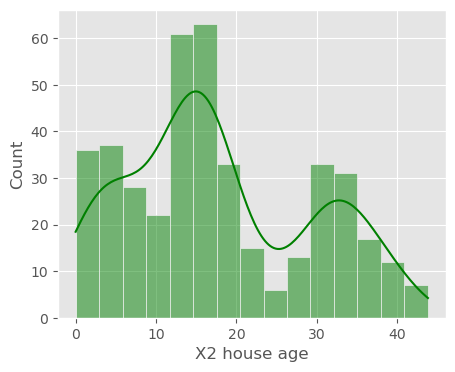

In [743]:
plt.figure(figsize=(5,4))
sns.histplot(data=df, x='X2 house age', bins=15, kde=True, color ='g')
plt.show()

* *We can see that the houses with ages between 10 and 20 have the highest frequency*

### Distance to the nearest MRT station

In [744]:
df['X3 distance to the nearest MRT station'].describe()

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: X3 distance to the nearest MRT station, dtype: float64

* **Longest distance:**  6488 meters
* **Shorstest distance:**  23 meters
* **Average distance:**  1083 meters

***50% of the houses have a distance to the nearest MRT station greater than or equal to 492 meters.***  
***25% of the houses have a distance to the nearest MRT station greater than or equal to 1454 meters.***

> ***There is a significant number of houses with distances to the nearest MRT station that are much farther compared to the number of houses with closer distances. There are more extreme  scores in the top 50% than in the bottom 50%.  median(492) << mean(1083)***

### Number of convenience stores

In [745]:
df['X4 number of convenience stores'].describe()

count    414.000000
mean       4.094203
std        2.945562
min        0.000000
25%        1.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: X4 number of convenience stores, dtype: float64

* **Median(4.0) ≈ Mean(4.094)**  
 *&rarr; The distribution is nearly symmetrical.*

In [746]:
df['X4 number of convenience stores'].value_counts().sort_index().to_frame()

,X4 number of convenience stores
0,67
1,46
2,24
3,46
4,31
5,67
6,37
7,31
8,30
9,25


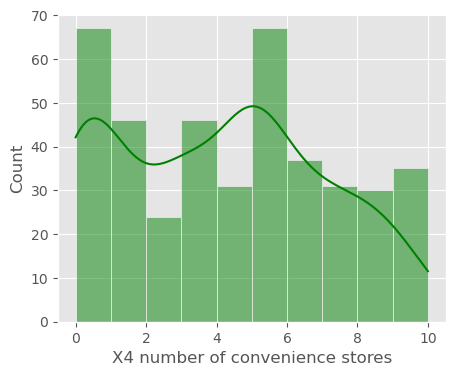

In [747]:
plt.figure(figsize=(5,4))
sns.histplot(data=df, x='X4 number of convenience stores', bins=10, kde=True, color = 'g')
plt.show()

### House price of unit area (target variable)

In [748]:
df['Y house price of unit area'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

* **Average price:** 37.9 (10000 New Taiwan Dollar/Ping)
* **Highest price:** 117.5 (10000 New Taiwan Dollar/Ping)
* **Lowest price:** 7.6 (10000 New Taiwan Dollar/Ping)  
 ***50% of the houses have price of unit area greater than or equal to  38.45 (10000 New Taiwan Dollar/Ping) .***  
 ***25% of the houses have price of unit area greater than or equal to  46.6 (10000 New Taiwan Dollar/Ping)  .***  
 
 ***&rarr; The data exhibits a considerable degree of variability, with a wide range and a relatively high standard deviation, indicating a large dispersion of values around the mean.***

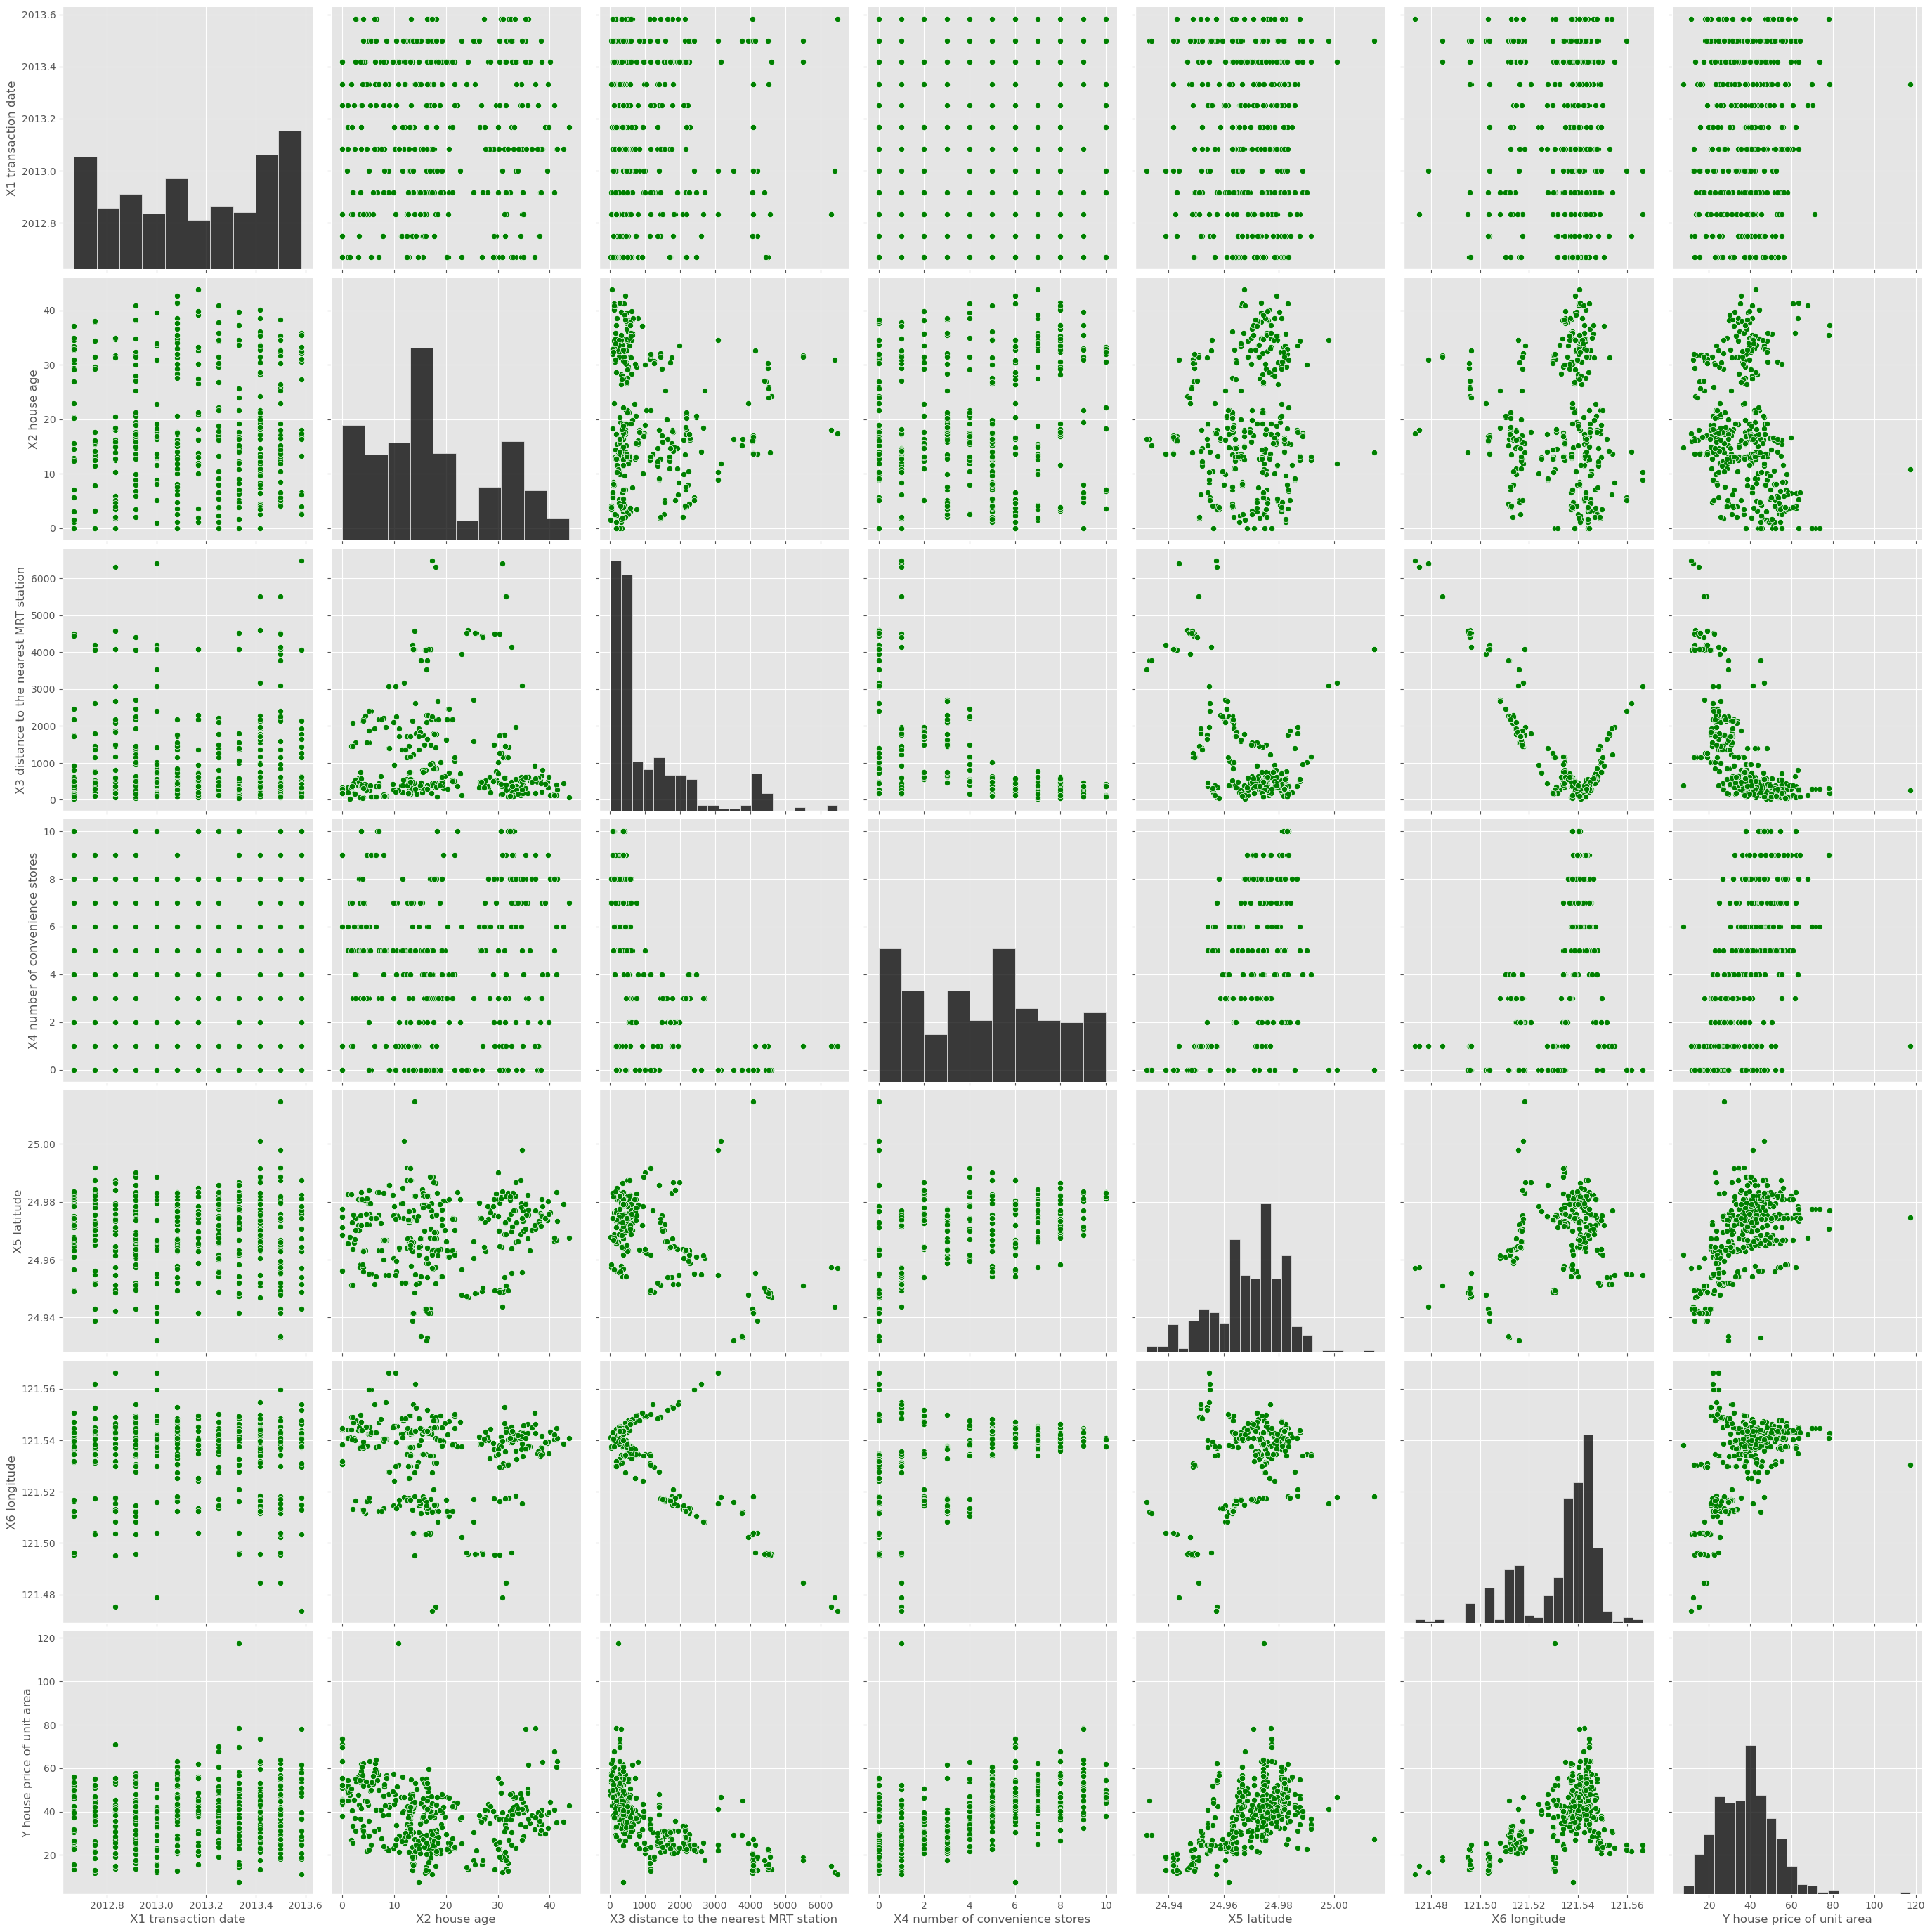

In [749]:
#The scatter plot illustrates the linear relationship between features, target variables.
sns.pairplot(df, height=4, plot_kws={'color': 'g'}, diag_kws={'color': 'k'})

**Observations:**
* ***'X3 - Distance to the nearest MRT station' & 'X6 - Longitude' are features that have a relationship with each other*** 
* ***'X3 - Distance to the nearest MRT station' & 'X5 - Latitude' are features that have a relationship with each other*** 
* ***'X3 - Distance to the nearest MRT station' & 'Y - House price of unit area' are features that have a relationship with each other*** 

# Data Preprocessing:


In [750]:
# Split the dataset into features (X) and the target variable (Y).
X = df.iloc[:,:-1]
y = df.iloc[:,-1].values.reshape(-1,1)

### Feature scaling

In [751]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_mms =mms.fit_transform(X)

In [752]:
X_mms

array([[0.27292576, 0.73059361, 0.00951267, 1.        , 0.61694135,
        0.71932284],
       [0.27292576, 0.44520548, 0.04380939, 0.9       , 0.5849491 ,
        0.71145137],
       [1.        , 0.30365297, 0.08331505, 0.5       , 0.67123122,
        0.75889584],
       ...,
       [0.63646288, 0.42922374, 0.05686115, 0.7       , 0.57149782,
        0.71522536],
       [0.36353712, 0.18493151, 0.0125958 , 0.5       , 0.42014057,
        0.72395946],
       [0.90938865, 0.14840183, 0.0103754 , 0.9       , 0.51211827,
        0.75016174]])

In [753]:
#convert to dataframe
X_mms_df = pd.DataFrame(X_mms, columns =['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'])

In [754]:
X_mms_df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,0.526169,0.404396,0.164047,0.409420,0.447892,0.645149
std,0.307824,0.260102,0.195233,0.294556,0.150390,0.165486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272926,0.206050,0.041138,0.100000,0.374818,0.588257
50%,0.545852,0.367580,0.072525,0.400000,0.472976,0.701962
75%,0.818777,0.642694,0.221342,0.600000,0.549988,0.752372
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***&rarr; All features are on the same scale.***


# Feature Selection/Engineering:


## Correlation Coefficient
### Between features and target variable

In [755]:
#Split the dataset into training and testing sets ( 80% for training, 20% for testing).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mms_df,y, test_size = 0.2,random_state = 101)
##


In [756]:
X_train.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [757]:
# function to calculate correlation coefficient
def correlation(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # covariance for x and y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Standard Deviation of x and y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # squaring by 0.5 to find the square root
    denominator = (std_deviation_x*std_deviation_y)**0.5 # short but equivalent to (std_deviation_x**0.5) * (std_deviation_y**0.5)
    cor = numerator/denominator
    return cor

# Create a list to store pairs (feature name, correlation value)
feature_correlation_list = []

# Loop through the columns of X_train and calculate the correlation coefficient with y_train
for column in X_train.columns:
    cor_func = correlation(X_train[column], y_train)
    # Add the pair (feature name, correlation value) to the list
    feature_correlation_list.append((column, cor_func))

# sort in descending order of correlation coefficient with the target variable
sorted_feature_correlation_list = sorted(feature_correlation_list, key=lambda x: abs(x[1]), reverse=True)

# print sorted list
for feature, correlation in sorted_feature_correlation_list:
    print(f"{feature}: {correlation}")


X3 distance to the nearest MRT station: [-0.66362887]
X4 number of convenience stores: [0.57508355]
X5 latitude: [0.53868871]
X6 longitude: [0.52427571]
X2 house age: [-0.23884076]
X1 transaction date: [0.11134298]


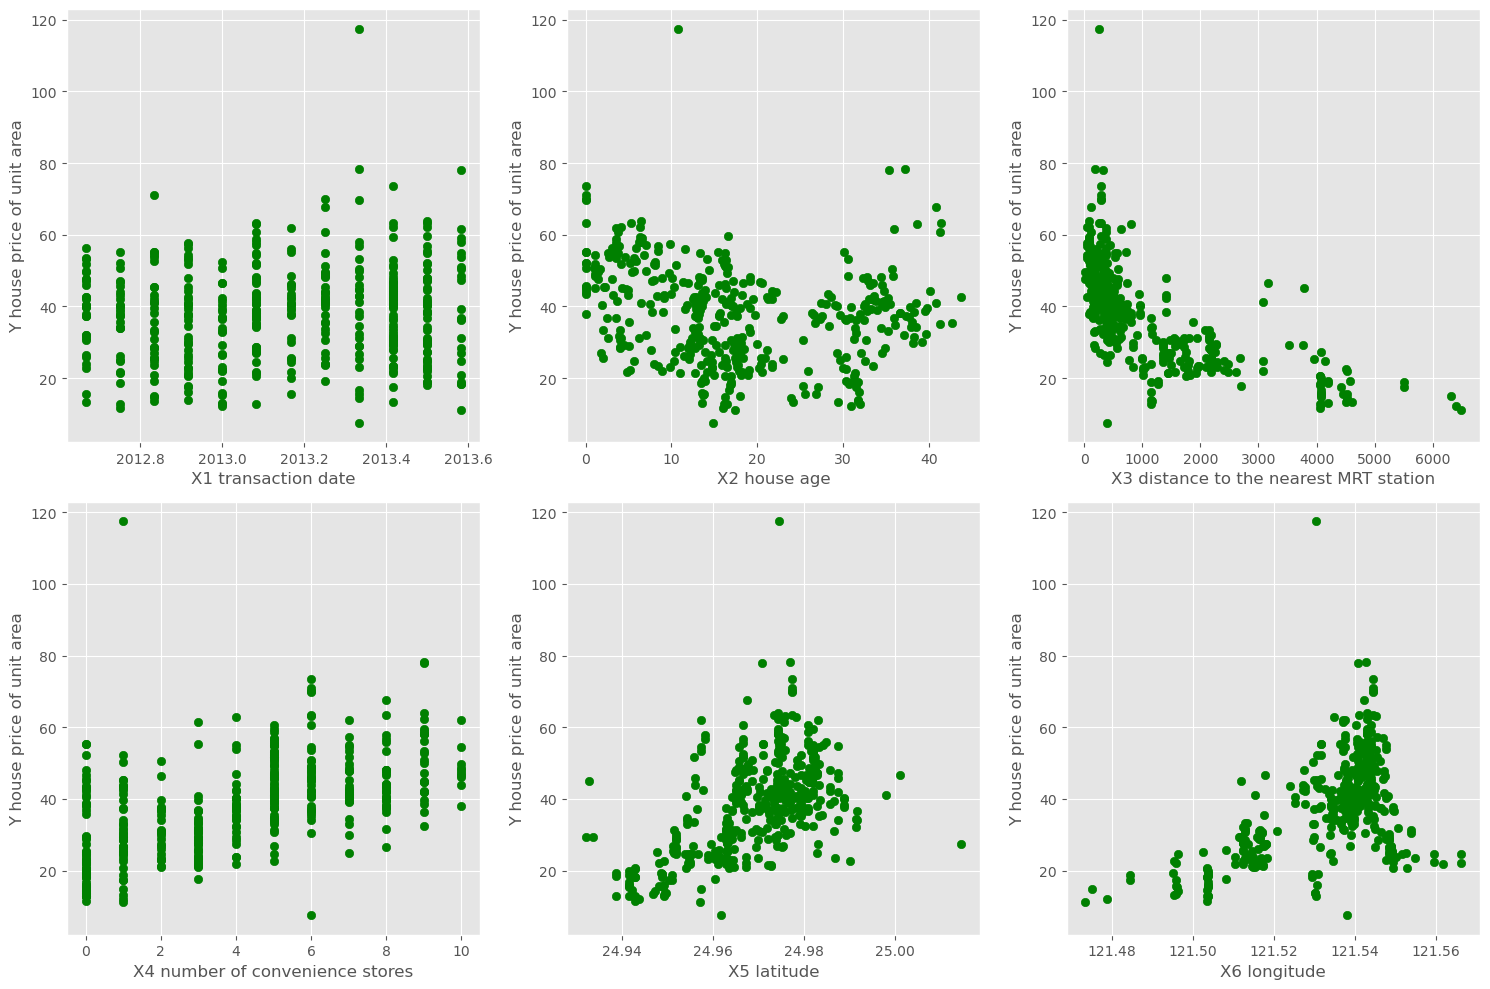

In [758]:
Y_plt = df['Y house price of unit area']
feats = df.columns[0:6]  
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
axes = axes.flatten()
for i, feat in enumerate(feats):
    axes[i].scatter(df[feat], Y_plt, color='g')
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel('Y house price of unit area')
plt.tight_layout()
plt.show()

**Draw Conclusions:**  
    *The Distance to the nearest MRT station is the feature with the strongest negative linear relationship*  
    *with the house price, with a correlation of (-0.66)."*    
    *&rarr; We can say: when the Distance to the nearest MRT station increases, the house price tends*  
    *to decrease.*

In [759]:
# Get the feature name with the lowest correlation (last element after sorting)
lowest_correlation_feature = sorted_feature_correlation_list[-1][0]
# Drop the feature with the lowest correlation from the DataFrame
X_train.drop(lowest_correlation_feature, axis=1, inplace=True)
X_test.drop(lowest_correlation_feature, axis=1, inplace=True)

In [760]:
X_train.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

### Between features and features

In [761]:
# find correlation matrix of features (X_train)
X_train.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
X2 house age,1.000000,0.044234,0.000962,0.041519,-0.074971
X3 distance to the nearest MRT station,0.044234,1.000000,-0.604196,-0.585575,-0.803600
X4 number of convenience stores,0.000962,-0.604196,1.000000,0.439346,0.446350
X5 latitude,0.041519,-0.585575,0.439346,1.000000,0.410167
X6 longitude,-0.074971,-0.803600,0.446350,0.410167,1.000000


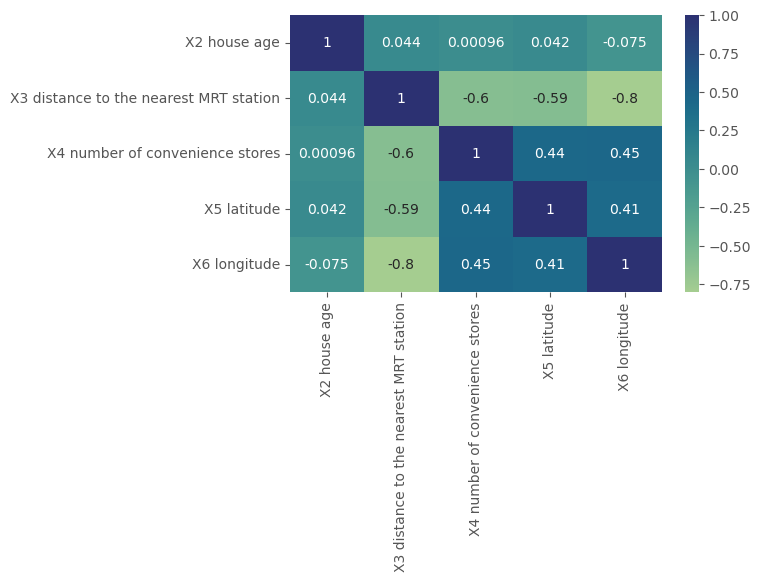

In [762]:
#Heatmap for correlation
#Using Pearson Correlation
plt.figure(figsize=(6,3.6))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap='crest')
plt.show()

In [763]:
# select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [764]:
corr_features = correlation(X_train, 0.8) # threshold = 0.8
len(set(corr_features))

1

In [765]:
corr_features

{'X6 longitude'}

In [766]:
# features that has the highest correlation with other features
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude'],
      dtype='object')

In [767]:
print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_train: {y_test.shape}")

Training size: 	X_train: (331, 4) 	y_train: (331, 1)
Testing size: 	X_test: (83, 4) 	y_train: (83, 1)


In [768]:
features = list(X_train.columns)

In [769]:
#convert to numpy array
X_train = X_train.values
X_test = X_test.values

## Model training

In [770]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
model = regressor.fit(X_train, y_train)

In [771]:
# print the intercept
print(regressor.intercept_)

[33.36728792]


In [772]:
#prediction
y_pred = regressor.predict(X_test)

## Model Evaluation

In [773]:
#Compare the model's scores on the training set and test set
linear_train_scored = model.score(X_train, y_train) 
linear_test_scored = model.score(X_test, y_test)
print(linear_train_scored)
print(linear_test_scored)

0.566194940104179
0.5912823474503273


In [774]:
# The coefficients
print("Coefficients: \n", regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[-12.64994544 -27.78323556  12.73293092  20.6021171 ]]
Mean squared error: 46.88
Coefficient of determination: 0.59


In [775]:
# Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and R-squared.
linear_MAE = metrics.mean_absolute_error(y_test,y_pred)
linear_MSE = metrics.mean_squared_error(y_test,y_pred)
linear_RMSE = np.sqrt(linear_MSE)
linear_R2 = r2_score(y_test, y_pred)
pd.DataFrame([linear_MAE,linear_MSE,linear_RMSE,linear_R2],index=['MAE', 'MSE', 'RMSE', 'R^2'], columns=['Metrics'])

,Metrics
MAE,5.266999
MSE,46.881628
RMSE,6.847016
R^2,0.591282


* **Low Mean Absolute Error (MAE):** The MAE indicates that the average deviation between predictions and actual values is around 5.27 points.  
* **Low RMSE:** An RMSE of 6.86 shows that the average deviation between predictions and actual values is not too high.  
* **Relatively high R-squared (R^2):** The R-squared value of 0.589387 indicates that the model explains about 58.94% of the variability in the dependent variable.


### Visualization

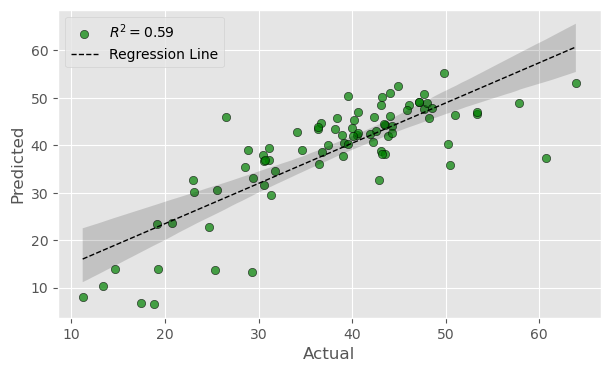

In [776]:
#Visualize the actual vs. predicted house prices
plt.style.use('default')
plt.style.use('ggplot')
plt.figure(figsize=(7,4))
sns.scatterplot(x=y_test.ravel(), y=y_pred.ravel(),edgecolor='k', facecolor='g', alpha=0.7, label=f'$R^2 = {linear_R2:.2f}$')
sns.regplot(x=y_test.ravel(), y=y_pred.ravel(), scatter=False, color='k', line_kws={"linewidth":1, "linestyle":"dashed"}, label='Regression Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

### Residual

In [777]:
test_residuals = (y_test - y_pred)

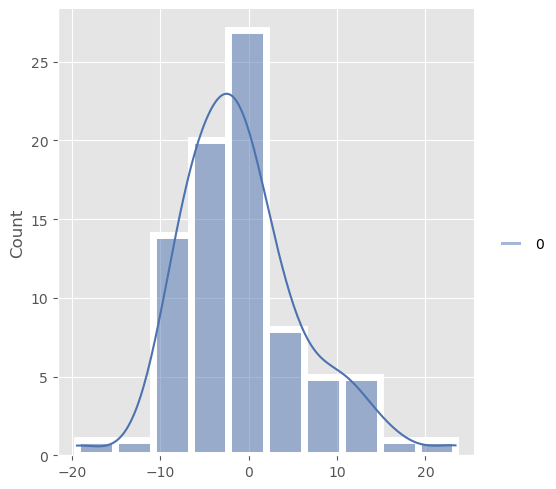

In [778]:
sns.set_palette("deep")
sns.displot(test_residuals, bins=10, kde=True, edgecolor='white', linewidth=5)

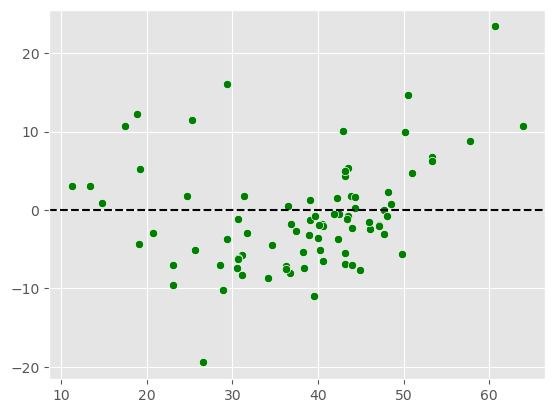

In [779]:
sns.scatterplot(x=y_test.flatten(), y=test_residuals.flatten(), color = 'g')
plt.axhline(y=0, color='k', ls='--')
plt.show()

## Hyperparameter Tuning

### Lasso

In [780]:
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', Lasso())
])
# GridSearch models on the alpha parameter space
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)}, # alpha: 1->10
                      cv = 5, # validation on the test set
                      scoring="neg_mean_squared_error", # average sum of squared residuals
                      verbose=3
                      )

In [781]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ................model__alpha=0.1;, score=-73.012 total time=   0.0s
[CV 2/5] END ................model__alpha=0.1;, score=-57.383 total time=   0.0s
[CV 3/5] END ...............model__alpha=0.1;, score=-155.976 total time=   0.0s
[CV 4/5] END ................model__alpha=0.1;, score=-93.603 total time=   0.0s
[CV 5/5] END ................model__alpha=0.1;, score=-73.621 total time=   0.0s
[CV 1/5] END ................model__alpha=0.2;, score=-73.527 total time=   0.0s
[CV 2/5] END ................model__alpha=0.2;, score=-57.633 total time=   0.0s
[CV 3/5] END ...............model__alpha=0.2;, score=-155.953 total time=   0.0s
[CV 4/5] END ................model__alpha=0.2;, score=-93.340 total time=   0.0s
[CV 5/5] END ................model__alpha=0.2;, score=-73.433 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-74.083 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004;,

[CV 5/5] END .model__alpha=3.5000000000000004;, score=-95.838 total time=   0.0s
[CV 1/5] END ...............model__alpha=3.6;, score=-114.224 total time=   0.0s
[CV 2/5] END ...............model__alpha=3.6;, score=-105.514 total time=   0.0s
[CV 3/5] END ...............model__alpha=3.6;, score=-174.506 total time=   0.0s
[CV 4/5] END ...............model__alpha=3.6;, score=-112.818 total time=   0.0s
[CV 5/5] END ................model__alpha=3.6;, score=-96.861 total time=   0.0s
[CV 1/5] END ...............model__alpha=3.7;, score=-115.656 total time=   0.0s
[CV 2/5] END ...............model__alpha=3.7;, score=-107.197 total time=   0.0s
[CV 3/5] END ...............model__alpha=3.7;, score=-175.007 total time=   0.0s
[CV 4/5] END ...............model__alpha=3.7;, score=-113.542 total time=   0.0s
[CV 5/5] END ................model__alpha=3.7;, score=-97.920 total time=   0.0s
[CV 1/5] END model__alpha=3.8000000000000003;, score=-117.116 total time=   0.0s
[CV 2/5] END model__alpha=3.

[CV 3/5] END ...............model__alpha=8.0;, score=-209.743 total time=   0.0s
[CV 4/5] END ...............model__alpha=8.0;, score=-159.320 total time=   0.0s
[CV 5/5] END ...............model__alpha=8.0;, score=-168.844 total time=   0.0s
[CV 1/5] END ...............model__alpha=8.1;, score=-179.829 total time=   0.0s
[CV 2/5] END ...............model__alpha=8.1;, score=-177.556 total time=   0.0s
[CV 3/5] END ...............model__alpha=8.1;, score=-210.883 total time=   0.0s
[CV 4/5] END ...............model__alpha=8.1;, score=-160.671 total time=   0.0s
[CV 5/5] END ...............model__alpha=8.1;, score=-171.158 total time=   0.0s
[CV 1/5] END ...............model__alpha=8.2;, score=-181.442 total time=   0.0s
[CV 2/5] END ...............model__alpha=8.2;, score=-179.350 total time=   0.0s
[CV 3/5] END ...............model__alpha=8.2;, score=-212.038 total time=   0.0s
[CV 4/5] END ...............model__alpha=8.2;, score=-162.037 total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [782]:
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Lasso(alpha=0.1))])
Best core:  -90.71894765777765


In [783]:
# Get the best model from GridSearch
best_model = search.best_estimator_
# fit model with train set
best_model.fit(X_train, y_train)
# Training error of the model on the training set
print(best_model.score(X_train, y_train))
# Regression coefficient and intercept coefficient
print(best_model.named_steps['model'].coef_)
print(best_model.named_steps['model'].intercept_)

0.5660724584317088
[-3.19409702 -5.2560468   3.56614224  3.04872837]
[37.99728097]


In [784]:
# Prediction on the test set
y_pred = best_model.predict(X_test)
# Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and R-squared.
lasso_MAE = metrics.mean_absolute_error(y_test,y_pred)
lasso_MSE = metrics.mean_squared_error(y_test,y_pred)
lasso_RMSE = np.sqrt(lasso_MSE)
lasso_R2 = r2_score(y_test, y_pred)
pd.DataFrame([lasso_MAE,lasso_MSE,lasso_RMSE,lasso_R2],index=['MAE', 'MSE', 'RMSE', 'R^2'], columns=['Metrics'])

,Metrics
MAE,5.217692
MSE,46.085153
RMSE,6.788605
R^2,0.598226


In [785]:
#Compare the model's scores on the training set and test set
lasso_train_scored =  best_model.score(X_train, y_train)
lasso_test_scored = best_model.score(X_test, y_test)
print(lasso_train_scored)
print(lasso_test_scored)

0.5660724584317088
0.5982260829144452


### Ridge

In [786]:
pipeline = Pipeline([
                     ('scaler', StandardScaler()),
                     ('model', Ridge())
])

# GridSearch models on the alpha parameter space
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)}, # alpha: 1->10
                      cv = 5, # validation on the test set
                      scoring="neg_mean_squared_error",# average sum of squared residuals
                      verbose=3
                      )

In [787]:
search.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ................model__alpha=0.1;, score=-72.542 total time=   0.0s
[CV 2/5] END ................model__alpha=0.1;, score=-57.211 total time=   0.0s
[CV 3/5] END ...............model__alpha=0.1;, score=-156.037 total time=   0.0s
[CV 4/5] END ................model__alpha=0.1;, score=-93.913 total time=   0.0s
[CV 5/5] END ................model__alpha=0.1;, score=-73.854 total time=   0.0s
[CV 1/5] END ................model__alpha=0.2;, score=-72.545 total time=   0.0s
[CV 2/5] END ................model__alpha=0.2;, score=-57.214 total time=   0.0s
[CV 3/5] END ...............model__alpha=0.2;, score=-156.034 total time=   0.0s
[CV 4/5] END ................model__alpha=0.2;, score=-93.908 total time=   0.0s
[CV 5/5] END ................model__alpha=0.2;, score=-73.845 total time=   0.0s
[CV 1/5] END model__alpha=0.30000000000000004;, score=-72.549 total time=   0.0s
[CV 2/5] END model__alpha=0.30000000000000004;,

[CV 1/5] END .model__alpha=3.5000000000000004;, score=-72.666 total time=   0.0s
[CV 2/5] END .model__alpha=3.5000000000000004;, score=-57.311 total time=   0.0s
[CV 3/5] END model__alpha=3.5000000000000004;, score=-155.941 total time=   0.0s
[CV 4/5] END .model__alpha=3.5000000000000004;, score=-93.765 total time=   0.0s
[CV 5/5] END .model__alpha=3.5000000000000004;, score=-73.561 total time=   0.0s
[CV 1/5] END ................model__alpha=3.6;, score=-72.670 total time=   0.0s
[CV 2/5] END ................model__alpha=3.6;, score=-57.314 total time=   0.0s
[CV 3/5] END ...............model__alpha=3.6;, score=-155.938 total time=   0.0s
[CV 4/5] END ................model__alpha=3.6;, score=-93.761 total time=   0.0s
[CV 5/5] END ................model__alpha=3.6;, score=-73.553 total time=   0.0s
[CV 1/5] END ................model__alpha=3.7;, score=-72.674 total time=   0.0s
[CV 2/5] END ................model__alpha=3.7;, score=-57.317 total time=   0.0s
[CV 3/5] END ...............

[CV 1/5] END ................model__alpha=8.1;, score=-72.856 total time=   0.0s
[CV 2/5] END ................model__alpha=8.1;, score=-57.462 total time=   0.0s
[CV 3/5] END ...............model__alpha=8.1;, score=-155.823 total time=   0.0s
[CV 4/5] END ................model__alpha=8.1;, score=-93.591 total time=   0.0s
[CV 5/5] END ................model__alpha=8.1;, score=-73.216 total time=   0.0s
[CV 1/5] END ................model__alpha=8.2;, score=-72.860 total time=   0.0s
[CV 2/5] END ................model__alpha=8.2;, score=-57.466 total time=   0.0s
[CV 3/5] END ...............model__alpha=8.2;, score=-155.820 total time=   0.0s
[CV 4/5] END ................model__alpha=8.2;, score=-93.587 total time=   0.0s
[CV 5/5] END ................model__alpha=8.2;, score=-73.209 total time=   0.0s
[CV 1/5] END ................model__alpha=8.3;, score=-72.865 total time=   0.0s
[CV 2/5] END ................model__alpha=8.3;, score=-57.469 total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [788]:
print(search.best_estimator_)
print('Best core: ', search.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('model', Ridge(alpha=9.9))])
Best core:  -90.57360837996355


In [789]:
# Get the best model from GridSearch
best_model = search.best_estimator_
# fit model with train set
best_model.fit(X_train, y_train)
# Training error of the model on the training set
print(best_model.score(X_train, y_train))
# Regression coefficient and intercept coefficient
print(best_model.named_steps['model'].coef_)
print(best_model.named_steps['model'].intercept_)

0.5660357651860912
[[-3.2052586  -5.14961589  3.598399    3.10448987]]
[37.99728097]


In [790]:
# Prediction on the test set
y_pred = best_model.predict(X_test)
# Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and R-squared.
ridge_MAE = metrics.mean_absolute_error(y_test,y_pred)
ridge_MSE = metrics.mean_squared_error(y_test,y_pred)
ridge_RMSE = np.sqrt(ridge_MSE)
ridge_R2 = r2_score(y_test, y_pred)
pd.DataFrame([ridge_MAE,ridge_MSE,ridge_RMSE,ridge_R2],index=['MAE', 'MSE', 'RMSE', 'R^2'], columns=['Metrics'])

,Metrics
MAE,5.203721
MSE,46.001913
RMSE,6.782471
R^2,0.598952


In [791]:
#Compare the model's scores on the training set and test set
ridge_train_scored =  best_model.score(X_train, y_train)
ridge_test_scored = best_model.score(X_test, y_test)
print(ridge_train_scored)
print(ridge_test_scored)

0.5660357651860912
0.598951772511773


## Conclusion and Further Analysis:


### Model

In [792]:
data = {
    'MAE': [linear_MAE, lasso_MAE, ridge_MAE],
    'MSE': [linear_MSE, lasso_MSE, ridge_MSE],
    'RMSE': [linear_RMSE, lasso_RMSE, ridge_RMSE],
    'R^2': [linear_R2, lasso_R2, ridge_R2]
}
metrics_df = pd.DataFrame(data, index=['Linear_Regression', 'Lasso_Regression', 'Ridge_Regression'])
# Round to two decimal places
metrics_df = metrics_df.round(3)
metrics_df

,MAE,MSE,RMSE,R^2
Linear_Regression,5.267,46.882,6.847,0.591
Lasso_Regression,5.218,46.085,6.789,0.598
Ridge_Regression,5.204,46.002,6.782,0.599


**Observations:**

* All three models have relatively similar performance in terms of MAE, MSE, and RMSE, with Ridge Regression slightly outperforming the others in terms of MAE, MSE, and RMSE.
  
  
* In terms of R-squared (R^2), which indicates the proportion of the variance in the dependent variable that is predictable from the independent variables, Ridge Regression has the highest value (0.599), followed closely by Lasso Regression (0.598), and then Linear Regression (0.591).
  
  
* Overall, Ridge Regression appears to be the best-performing model among the three based on these metrics, as it achieves the lowest errors and the highest R-squared value. However, the differences in performance are relatively small

#### Model best scored:

In [793]:
data = {
    'Train set scored': [linear_train_scored, lasso_train_scored, ridge_train_scored],
    'Test set scored': [linear_test_scored, lasso_test_scored, ridge_test_scored],
}
metrics_df = pd.DataFrame(data, index=['Linear_Regression', 'Lasso_Regression', 'Ridge_Regression'])
# Round to two decimal places
metrics_df = metrics_df.round(3)
metrics_df

,Train set scored,Test set scored
Linear_Regression,0.566,0.591
Lasso_Regression,0.566,0.598
Ridge_Regression,0.566,0.599


#### Evaluate:

* All three models perform similarly on the training set, with scores around 0.566.  

* On the test set, both Lasso and Ridge regression models outperform the Linear Regression model slightly, with scores of 0.598 and 0.599 respectively, compared to 0.591 for Linear Regression.   

* The Lasso and Ridge regularization techniques seem to have helped in generalizing the models better to unseen data, as evidenced by their slightly higher test set scores compared to the basic Linear Regression model.

* Overall, both Lasso and Ridge Regression show slight improvements over the basic Linear Regression model, with Ridge Regression performing marginally better on the test set

#### Draw Conclusion:

* The linear regression model performs relatively well with stable Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE), and achieves a high R² value, indicating a good fit between the actual data and predictions.

* The Lasso model tends to reduce the complexity of the model and mitigate overfitting by setting coefficients to zero for unimportant variables. However, the performance does not show significant improvement compared to the linear regression model.

* Similarly, the Ridge model also tends to mitigate overfitting by reducing the weights of important variables. The performance of the model does not show significant improvement compared to the linear regression model.

### Limitations & assumptions

* The model assumes a linear relationship between input variables and prices, which may not be entirely accurate in practice.

* **Outliers:** Linear regression models are sensitive to outliers. Extreme values can have a disproportionately large effect on the model and can skew the results.

### Suggested improvements

* Feature expansion: Add new feature variables or combine existing variables to reflect more complex relationships between variables and house prices.
* Collect more data to improve model performance.
* Use more powerful model types to, possibly, be non-linear.

## Report Summary

### Methodology:

* The analysis utilized linear regression models to predict housing prices based on various features
* Data preprocessing steps included scaling numerical features, features selection
* Three types of linear regression models were employed: Linear Regression, Lasso Regression, and Ridge Regression.
* Model evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²) were used to assess model performance.

### Results:

* The Linear Regression model achieved a training R² score of 0.566 and a test R² score of 0.591.
* The Lasso Regression model yielded slightly better results with a training R² score of 0.566 and a test R² score of 0.598.
* Similarly, the Ridge Regression model performed well with a training R² score of 0.566 and a test R² score of 0.599.

## Conclusions:

* The linear regression models showed a reasonably good fit to the data, as indicated by the high R² scores.
* Lasso and Ridge Regression models helped mitigate multicollinearity issues by penalizing the magnitude of regression coefficients.
* Despite the success of the models, there may be limitations such as the assumption of linearity between predictors and the target variable.